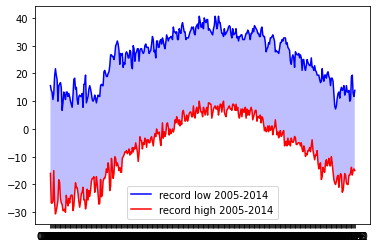

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as dates
dfOriginal = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# Sort the data by 'Date' and 'ID'
dfOriginal = dfOriginal.sort_values(['Date', 'ID'])
#dfOriginal.head()
# Remove data for Feb 29th
indexNames = dfOriginal[ dfOriginal['Date'].str.endswith('02-29')].index
dfOriginal.drop(indexNames , inplace=True)
#print(dfOriginal.count())
# get temperature in degrees C 
dfOriginal['Data_Value'] = dfOriginal['Data_Value'].apply(lambda x: x / 10)
dfOriginal['Year'] = dfOriginal['Date'].apply(lambda x: x[:4])
dfOriginal['Month'] = dfOriginal['Date'].apply(lambda x: x[5:7])
dfOriginal['Day'] = dfOriginal['Date'].str[-5:]
dfOriginal.head(5)
# Remove data for 2015
df1=dfOriginal.copy()
indexNames = df1[ df1['Date'].str.startswith('2015')].index
df1.drop(indexNames , inplace=True)
#print(dfOriginal.count())
#print(df1.count())
result1 = df1.groupby('Day')['Data_Value'].agg(['max', 'min']).reset_index()
#print(result1)
#Part 1 of assignment
plt.figure()
plt.plot(result1['Day'] ,result1['max'], color='b', label='record low 2005-2014')
plt.plot(result1['Day'] ,result1['min'], color='r', label='record high 2005-2014')
plt.gca().fill_between(result1['Day'], 
                       result1['min'], result1['max'], 
                       facecolor='blue', 
                       alpha=0.25)
plt.legend(loc='best')